In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [3]:
trainset = torchvision.datasets.FashionMNIST(root='../../DL/data/images/fashion', train=True, download=True)
x, y = trainset.train_data, trainset.train_labels

0it [00:00, ?it/s]

26427392it [00:05, 4747853.22it/s]                              


Extracting ../../DL/data/images/fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../DL/data/images/fashion/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 68178.75it/s]                            
0it [00:00, ?it/s]

Extracting ../../DL/data/images/fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../DL/data/images/fashion/FashionMNIST/raw


4423680it [00:01, 2528049.28it/s]                             
0it [00:00, ?it/s]

Extracting ../../DL/data/images/fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../DL/data/images/fashion/FashionMNIST/raw


8192it [00:00, 24273.32it/s]            


Extracting ../../DL/data/images/fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../DL/data/images/fashion/FashionMNIST/raw
Processing...
Done!


//anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
//anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


8


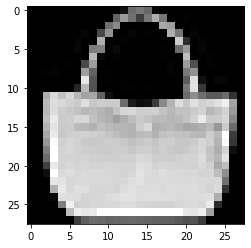

In [4]:
ii = 100
imshow(x[ii].numpy(), cmap=cm.gray)
print(y[ii].numpy())

## Task 1

### Model Definition

In [5]:
class CNN(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv0 = nn.Conv2d(1, nf, 3, stride=2, padding=1)
        self.conv1 = nn.Conv2d(nf, 2*nf, 3, stride=2, padding=1)
        # ...


    def forward(self, x):
        c = F.relu(self.conv0(x))
        c = F.relu(self.conv1(c))
        # ...

### End of Model Definition

In [10]:
net = CNN(32).cuda(0)

### Training

In [ ]:
def train_func(b):
    bx, by = b
    pred = net(bx.cuda(0))
    loss = F.cross_entropy(pred, by.cuda(0))
    return loss

opt = torch.optim.Adam(net.parameters(), lr=1e-4)

for epoch in range(max_epoches):
    for batch in batch_iterator():
        loss = train_func(batch)
    
        loss.backward()
        opt.step()
        opt.zero_grad()

In [16]:
torch.save(net.state_dict(), 'saved_model.pt')

### Plots and Analysis